https://21percentme.github.io/Milestone1

# Introduction

Group Members: Jason Li and Alex Motyka

For our project, we have found two pretty cool datasets that we wanted to look into. The first dataset is the Video Game Sales dataset. The other dataset is just a larger video game dataset with more info.

In our two datasets, we really want to understand some of the general trends with video game sales. For example, we want to understand how video game sales varies with time and location, as well how different genres differ in sales and popularity.

We want to understand if there is a relationship between the the MetaCritic Reviews and User Reviews, and if there is a relationship between the number of acheivements in the game and the status of completion for that game for users. If there is a relationship, we also want to know if we could create a model to predict trends. We also want to see if this relationship is affected by the genre of the game.

# Collaboration Plan:

We plan on meeting weekly via zoom, with a Github Repository as our main collaboraiton method. We may also use Google Collab, as it has been what we are using in class, but we will really only move if the Github Repository does not work out well. We are utilizing GroupMe and Texts to communicate for this project, as well as setting up a ToDo list in order to efficiently assign tasks to each group member.

In [2]:
#run if you are missing pandas:
#!pip install pandas
#%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 1.6 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Dataset 1: Video Game Sales (https://www.kaggle.com/datasets/gregorut/videogamesales)**

### Project Goals: 

We chose this dataset because video games have gained popluarity along the years, especially with the recent mobility aspects of consoles. From here, it would be interesting to see how different video games have sold over the past years, which games are the most popular, and see how sale trends correspond with real life events

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com, uploaded by GregorySmith


Fields include:

    Rank - Ranking of overall sales
    Name - The games name
    Platform - Platform of the games release (i.e. PC,PS4, etc.)
    Year - Year of the game's release
    Genre - Genre of the game
    Publisher - Publisher of the game
    NA_Sales - Sales in North America (in millions)
    EU_Sales - Sales in Europe (in millions)
    JP_Sales - Sales in Japan (in millions)
    Other_Sales - Sales in the rest of the world (in millions)
    Global_Sales - Total worldwide sales.

In [4]:
#read the video game sales csv into a dataframe
game_sales = pd.read_csv("vgsales.csv")
#display first 5 rows to see what the data looks like

game_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Right now we should start with cleaning the dataset up a bit, so lets check how many null entries there are

In [5]:
#in here we sum up the number of null entries
game_sales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Looks like there are 271 null entries in year, so we do not know when 271 of the games were release. Additionally, 58 games have an unknown/unreported publisher. This may mess up our data analyzing, so lets just drop the entries with those null values. We are making sure to check that they were dropped.

In [6]:
# #in hhere we drop all null values
games = game_sales.dropna()
#and we check to see if it worked below
games.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Lets start looking into some basic analysis of the data! Lets first look at some basic summary stats of the data.

In [7]:
#so here we see some basic summary stats
games = game_sales
games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


From here, we also look at what data types each variable is

In [8]:
#and call .info() to see the variable types
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Note that Platform, Genre, and Publisher are objects (strings). These variables are important to the questions we want to answer using this dataset, so we should consider turning these into individual binary columns based on the number of possible values.

The following histogram shows the distribution of games over time. It is easy to see how the number of video games on the market skyrocketed starting around 1995.

In [9]:
games.groupby('Year')['Global_Sales'].sum()

Year
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.16
1993.0     45.98
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.47
1999.0    251.27
2000.0    201.56
2001.0    331.47
2002.0    395.52
2003.0    357.85
2004.0    419.31
2005.0    459.94
2006.0    521.04
2007.0    611.13
2008.0    678.90
2009.0    667.30
2010.0    600.45
2011.0    515.99
2012.0    363.54
2013.0    368.11
2014.0    337.05
2015.0    264.44
2016.0     70.93
2017.0      0.05
2020.0      0.29
Name: Global_Sales, dtype: float64

In [10]:
games.groupby('Year').Global_Sales.sum().idxmax()

2008.0

In [11]:
games.groupby('Year').Global_Sales.sum().idxmin()

2017.0

In [12]:
games.Genre.value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

It is cool to see the year video games sold the best is in 2017, and the worst in 2008, with the genre of action being the best selling.

Some questions we will investigate with this dataset: 
-How did the popularity of video game genres change over time?
-Were genres and games popular in North America similar to those popular in the EU and Japan? Did trends across regions occur in sync, or did they feature some lag with respect to region?
-How did the popularity of video game platforms change over time, and did these changes line up with major shifts in genre popularity?
Because each row breaks each game's sales down by region, and also includes platform, genre, and year information, we will be able to answer the above questions with this dataset.

From here, we want to see the how video games sales differ with year and location

Text(0, 0.5, 'Region')

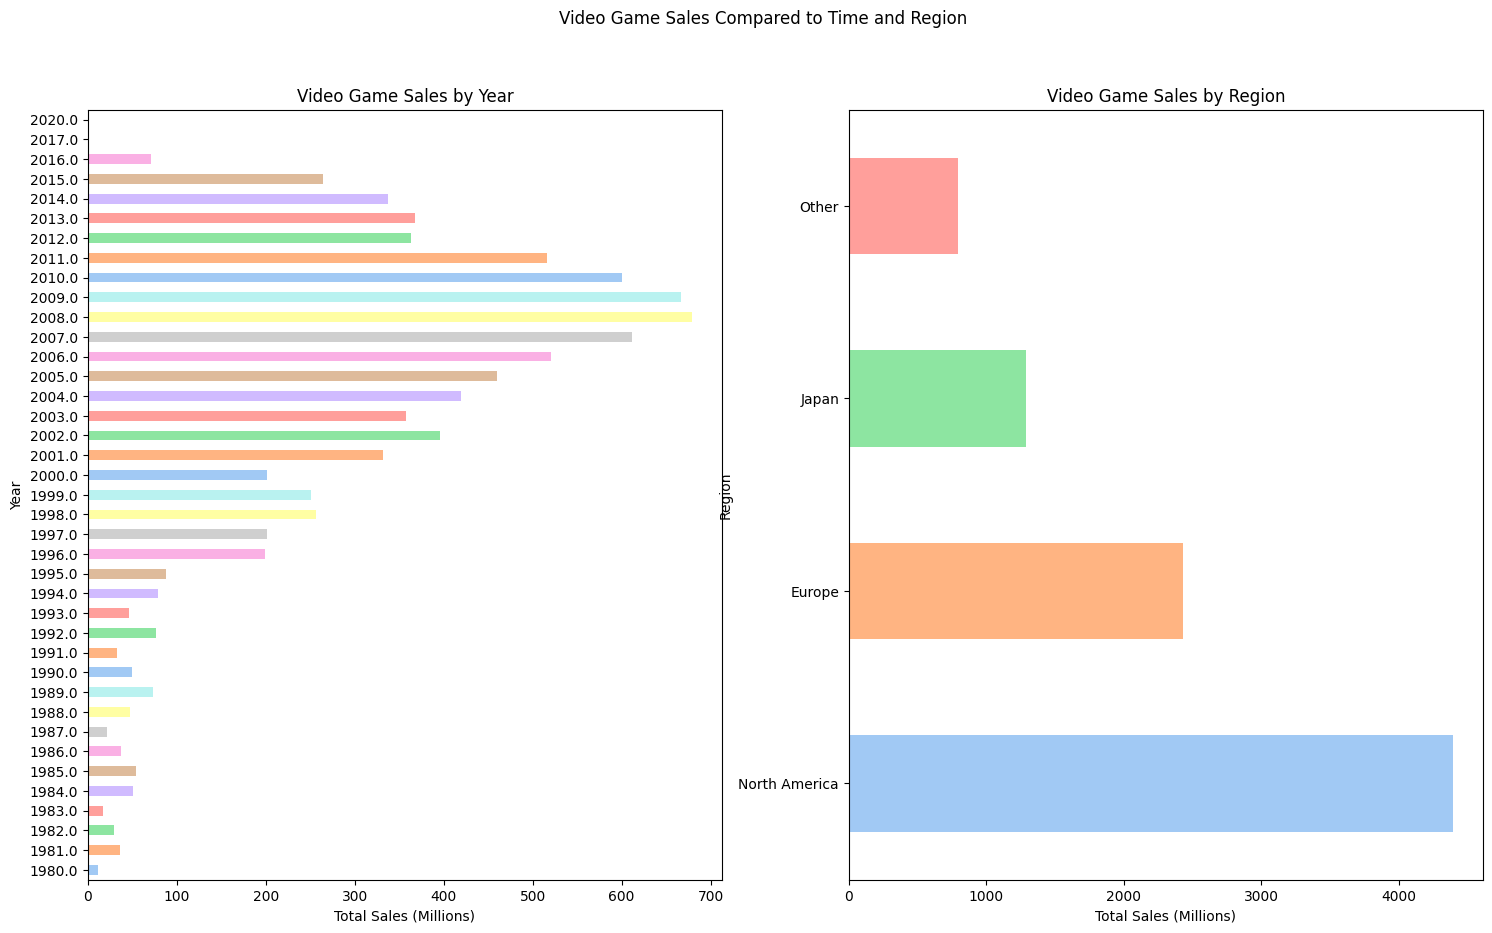

In [13]:
#rename columns for regions to be more intuitive
games = games.rename(columns={'Other_Sales': "Other", "JP_Sales": "Japan", "EU_Sales":"Europe", "NA_Sales":"North America"})
#group the global sales by year to see sales by year
years = games.groupby('Year')['Global_Sales'].sum()
#drop every column except for region, so we get sales per region
location = games.drop(columns=["Rank", "Year", "Global_Sales", "Platform", "Name", "Genre", "Publisher"]).sum()

#create sbplots to plot two plots at the same time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18,10))
fig.suptitle('Video Game Sales Compared to Time and Region')

years.plot(kind = 'barh', color = sns.color_palette("pastel"), title = "Video Game Sales by Year", ax = ax1)
ax1.set_xlabel("Total Sales (Millions)")
ax1.set_ylabel("Year")
location.plot(kind = 'barh', color = sns.color_palette("pastel"), title = "Video Game Sales by Region", ax = ax2)
ax2.set_xlabel("Total Sales (Millions)")
ax2.set_ylabel("Region")


<span style="color:red"> 
Jason will talk about some summary statistic, like mean and max and min of these sets
</span>

From here, we were wondering if there were any differences in genre popularity in different regions.

Text(0.5, 0, 'Genres')

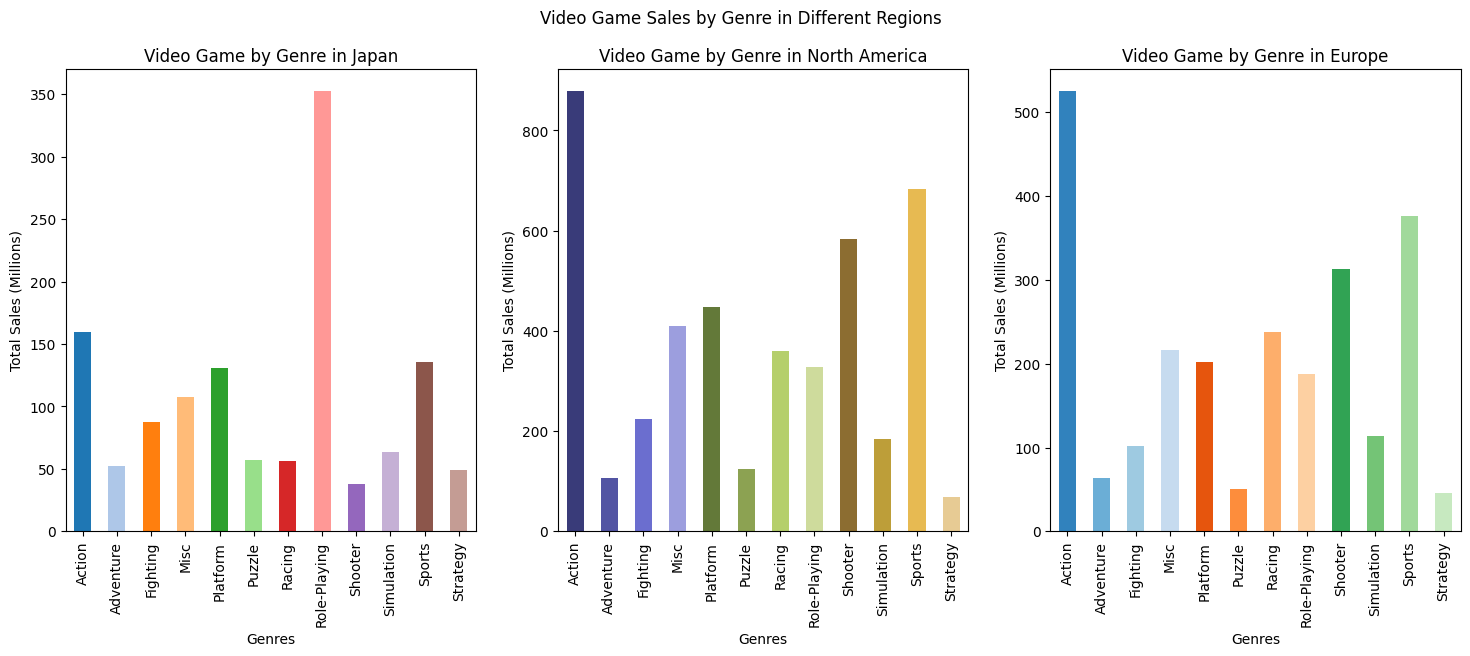

In [14]:
#group by region

#drop every column except for regions and genre, so we can see genre sales per
grouping = games.drop(columns=["Rank", "Year", "Global_Sales", "Platform", "Name", "Publisher"])
genres = grouping.groupby("Genre").sum()

#Genre for Japan  = JA, Genre for North America is genre for NA, and so forth
JA = genres["Japan"]
NA = genres["North America"]
EU = genres["Europe"]

#create sbplots to plot three plots at the same time
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,6))
fig.suptitle('Video Game Sales by Genre in Different Regions')

JA.plot(kind = 'bar', color = sns.color_palette("tab20"), title = "Video Game by Genre in Japan", ax = ax1)
ax1.set_ylabel("Total Sales (Millions)")
ax1.set_xlabel("Genres")

NA.plot(kind = 'bar', color = sns.color_palette("tab20b"), title = "Video Game by Genre in North America", ax = ax2)
ax2.set_ylabel("Total Sales (Millions)")
ax2.set_xlabel("Genres")

EU.plot(kind = 'bar', color = sns.color_palette("tab20c"), title = "Video Game by Genre in Europe", ax = ax3)
ax3.set_ylabel("Total Sales (Millions)")
ax3.set_xlabel("Genres")


<span style="color:red"> 
Jason will talk about some summary statistic, like mean and max and min of these sets
</span>

## **Dataset 2: Video Game Dataset (https://www.kaggle.com/datasets/jummyegg/rawg-game-dataset?rvi=1)**

This dataset has data on 474417 Games, made by TRUNG HOANG

Fields include:

    id: An unique ID identifying this Game in RAWG Database
    slug: An unique slug identifying this Game in RAWG Database
    name: Name of the game
    metacritic: Rating of the game on Metacritic
    released: The date the game was released
    tba: To be announced state
    updated: The date the game was last updated
    website: Game Website
    rating: Rating rated by RAWG user
    rating_top: Maximum rating
    playtime: Hours needed to complete the game
    achievements_count: Number of achievements in game
    ratings_count: Number of RAWG users who rated the game
    suggestions_count: Number of RAWG users who suggested the game
    game_series_count: Number of games in the series
    reviews_count: Number of RAWG users who reviewed the game
    platforms: Platforms game was released on. Separated by ||
    developers: Game developers. Separated by ||
    genres: Game genres. Separated by ||
    publishers: Game publishers. Separated by ||
    esrb_rating: ESRB ratings
    added_status_yet: Number of RAWG users had the game as "Not played"
    added_status_owned: Number of RAWG users had the game as "Owned"
    added_status_beaten: Number of RAWG users had the game as "Completed"
    added_status_toplay: Number of RAWG users had the game as "To play"
    added_status_dropped: Number of RAWG users had the game as "Played but not beaten"
    added_status_playing: Number of RAWG users had the game as "Playing"

This dataset was interesting to us because it is another dataset on video games. We want to use this to get more info

In [72]:
gameinfo = pd.read_csv("game_info.csv")
gameinfo.head()

,id,slug,name,metacritic,released,tba,updated,website,rating,rating_top,...,developers,genres,publishers,esrb_rating,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing
0,1,dgeneration-hd,D/Generation HD,NaN,2015-10-23,False,2019-09-17T11:58:57,http://dgeneration.net,0.0,0,...,West Coast Software,Adventure||Puzzle,West Coast Software,Everyone 10+,4,88,2,2,0,0
1,10,g-prime,G Prime Into The Rain,NaN,2016-01-06,False,2019-11-06T23:04:19,NaN,0.0,0,...,Soma Games,Simulation||Indie,Immanitas Entertainment||Code-Monkeys,Everyone,2,42,2,0,0,0
2,100,land-sliders,Land Sliders,NaN,2015-09-24,False,2019-10-22T13:56:16,http://prettygreat.com,0.0,0,...,Prettygreat Pty,Adventure||Arcade,Prettygreat Pty,Everyone 10+,0,2,2,0,1,0
3,1000,pixel-gear,Pixel Gear,NaN,2016-10-20,False,2019-08-28T22:16:02,https://www.facebook.com/Geronimo-Interactive-...,0.0,0,...,Oasis Games||Geronimo Interactive,Action||Indie,Geronimo Interactive,Teen,0,1,0,0,0,0
4,10000,gods-and-idols,Gods and Idols,NaN,2016-12-12,False,2019-09-17T13:37:13,http://www.godsandidols.com/,0.0,1,...,Viking Tao,RPG||Strategy||Massively Multiplayer,Viking Tao,NaN,2,79,0,0,0,0


Lets again see where the null values are

In [73]:
gameinfo.isnull().sum()

id                           0
slug                         2
name                         3
metacritic              469684
released                 24199
tba                          0
updated                      0
website                 409376
rating                       0
rating_top                   0
playtime                     0
achievements_count           0
ratings_count                0
suggestions_count            0
game_series_count            0
reviews_count                0
platforms                 3986
developers                8366
genres                  103185
publishers              333401
esrb_rating             418553
added_status_yet             0
added_status_owned           0
added_status_beaten          0
added_status_toplay          0
added_status_dropped         0
added_status_playing         0
dtype: int64

In [74]:
gameinfo = gameinfo.drop(['slug', 'tba', 'updated', 'website', 'rating_top', 'developers', 'publishers', 'esrb_rating', 'reviews_count', 'suggestions_count', 'game_series_count'], axis=1)

gameinfo.head()

,id,name,metacritic,released,rating,playtime,achievements_count,ratings_count,platforms,genres,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing
0,1,D/Generation HD,NaN,2015-10-23,0.0,1,80,2,PC||macOS||Xbox One||PlayStation 4||Nintendo S...,Adventure||Puzzle,4,88,2,2,0,0
1,10,G Prime Into The Rain,NaN,2016-01-06,0.0,0,26,3,macOS||PC||Xbox One,Simulation||Indie,2,42,2,0,0,0
2,100,Land Sliders,NaN,2015-09-24,0.0,0,0,2,iOS,Adventure||Arcade,0,2,2,0,1,0
3,1000,Pixel Gear,NaN,2016-10-20,0.0,0,0,0,PC||PlayStation 4,Action||Indie,0,1,0,0,0,0
4,10000,Gods and Idols,NaN,2016-12-12,0.0,1,0,5,PC,RPG||Strategy||Massively Multiplayer,2,79,0,0,0,0


In [75]:
gameinfo.describe()

,id,metacritic,rating,playtime,achievements_count,ratings_count,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing
count,474417.000000,4733.000000,474417.000000,474417.000000,474417.000000,474417.000000,474417.000000,474417.000000,474417.000000,474417.000000,474417.000000,474417.000000
mean,266884.000325,73.159307,0.085723,0.221662,4.448837,2.142463,0.685030,11.251418,1.361486,0.430767,0.678100,0.149027
std,154567.811630,11.502213,0.545049,5.399684,117.671466,36.553606,9.012424,128.531595,28.519725,8.970948,10.484977,3.911149
min,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,133664.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,267945.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,406010.000000,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,525551.000000,99.000000,5.000000,1600.000000,12322.000000,4289.000000,635.000000,8298.000000,3533.000000,2325.000000,1092.000000,644.000000


In [76]:
gameinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474417 entries, 0 to 474416
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    474417 non-null  int64  
 1   name                  474414 non-null  object 
 2   metacritic            4733 non-null    float64
 3   released              450218 non-null  object 
 4   rating                474417 non-null  float64
 5   playtime              474417 non-null  int64  
 6   achievements_count    474417 non-null  int64  
 7   ratings_count         474417 non-null  int64  
 8   platforms             470431 non-null  object 
 9   genres                371232 non-null  object 
 10  added_status_yet      474417 non-null  int64  
 11  added_status_owned    474417 non-null  int64  
 12  added_status_beaten   474417 non-null  int64  
 13  added_status_toplay   474417 non-null  int64  
 14  added_status_dropped  474417 non-null  int64  
 15  

In [77]:
gameinfo['released'] = pd.to_datetime(gameinfo['released'], errors='coerce')

metacritic_info = gameinfo.dropna()

metacritic_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4671 entries, 43 to 474387
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    4671 non-null   int64         
 1   name                  4671 non-null   object        
 2   metacritic            4671 non-null   float64       
 3   released              4671 non-null   datetime64[ns]
 4   rating                4671 non-null   float64       
 5   playtime              4671 non-null   int64         
 6   achievements_count    4671 non-null   int64         
 7   ratings_count         4671 non-null   int64         
 8   platforms             4671 non-null   object        
 9   genres                4671 non-null   object        
 10  added_status_yet      4671 non-null   int64         
 11  added_status_owned    4671 non-null   int64         
 12  added_status_beaten   4671 non-null   int64         
 13  added_status_toplay 

/var/folders/y4/kvqj1w0s4q3366fq435ngvsr0000gn/T/ipykernel_64279/3167218373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metacritic_info['release_year'] = metacritic_info['released'].dt.year


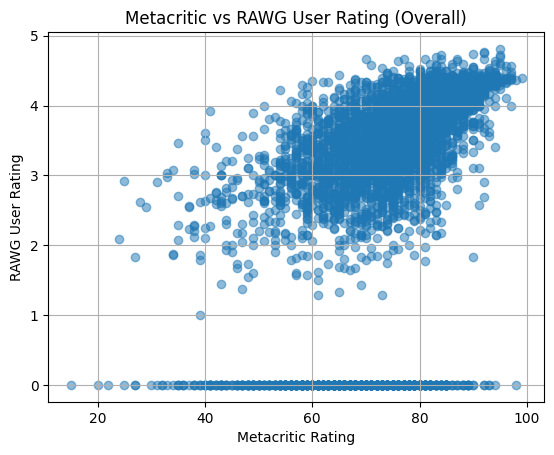

In [78]:
import matplotlib.pyplot as plt

metacritic_info['release_year'] = metacritic_info['released'].dt.year

def plot_metacritic_vs_rating(data, title):
    plt.scatter(data['metacritic'], data['rating'], alpha=0.5)
    plt.title(title)
    plt.xlabel('Metacritic Rating')
    plt.ylabel('RAWG User Rating')
    plt.grid(True)
    plt.show()

plot_metacritic_vs_rating(metacritic_info, 'Metacritic vs RAWG User Rating (Overall)')


There appears to be a positive correllation between metacritic and user reviews. However, it is clear that we need to consider games that were not rated by users, as this will affect any model we play try to implement.

/var/folders/y4/kvqj1w0s4q3366fq435ngvsr0000gn/T/ipykernel_64279/4191434521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metacritic_info['completion_percentage'] = (metacritic_info['added_status_beaten'] / metacritic_info['ratings_count']) * 100


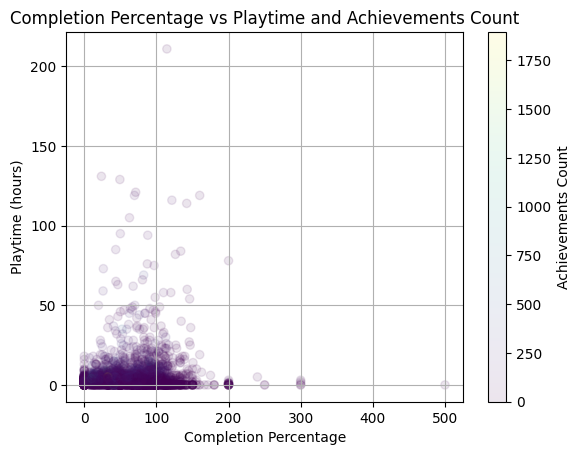

In [79]:
metacritic_info['completion_percentage'] = (metacritic_info['added_status_beaten'] / metacritic_info['ratings_count']) * 100

plt.scatter(metacritic_info['completion_percentage'], metacritic_info['playtime'], c=metacritic_info['achievements_count'], cmap='viridis', alpha=0.1)
plt.colorbar(label='Achievements Count')
plt.title('Completion Percentage vs Playtime and Achievements Count')
plt.xlabel('Completion Percentage')
plt.ylabel('Playtime (hours)')
plt.grid(True)
plt.show()

There doesn't appear to be any sort of meaningful relationship here. Let's try something else instead.

In [80]:
metacritic_info['genres']

43                         Action||Adventure||Indie
85                                 Action||Strategy
207                        Action||Adventure||Indie
249                                      RPG||Indie
291             Action||Strategy||Simulation||Indie
                            ...                    
474208    Adventure||RPG||Simulation||Casual||Indie
474216                             Action||Strategy
474237              Strategy||Massively Multiplayer
474292                         Strategy||Simulation
474387        Action||Shooter||Strategy||Simulation
Name: genres, Length: 4671, dtype: object

In [83]:
genres_dummies = metacritic_info['genres'].str.get_dummies()

metacritic_info = pd.concat([metacritic_info, genres_dummies], axis=1)

metacritic_info = metacritic_info.drop('genres', axis=1)

In [84]:
metacritic_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4671 entries, 43 to 474387
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     4671 non-null   int64         
 1   name                   4671 non-null   object        
 2   metacritic             4671 non-null   float64       
 3   released               4671 non-null   datetime64[ns]
 4   rating                 4671 non-null   float64       
 5   playtime               4671 non-null   int64         
 6   achievements_count     4671 non-null   int64         
 7   ratings_count          4671 non-null   int64         
 8   platforms              4671 non-null   object        
 9   added_status_yet       4671 non-null   int64         
 10  added_status_owned     4671 non-null   int64         
 11  added_status_beaten    4671 non-null   int64         
 12  added_status_toplay    4671 non-null   int64         
 13  added

In [86]:
metacritic_info['metacritic'] /= 20

/var/folders/y4/kvqj1w0s4q3366fq435ngvsr0000gn/T/ipykernel_64279/1025965045.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

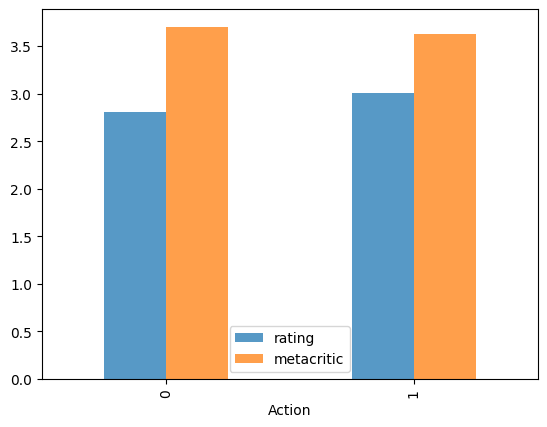

<Figure size 1200x600 with 0 Axes>

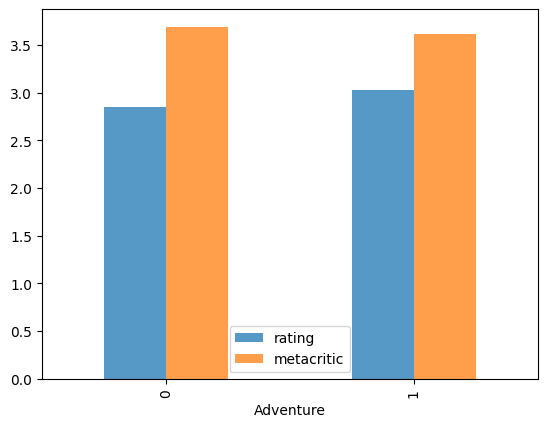

<Figure size 1200x600 with 0 Axes>

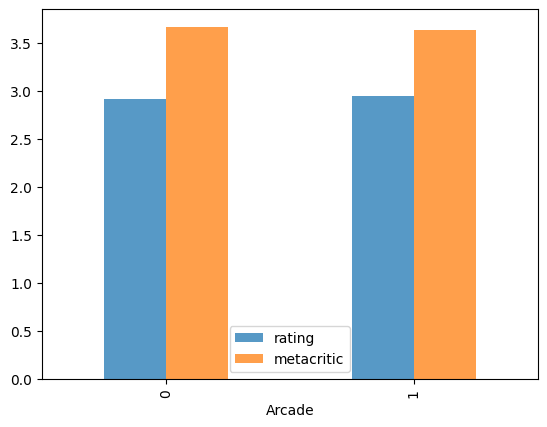

<Figure size 1200x600 with 0 Axes>

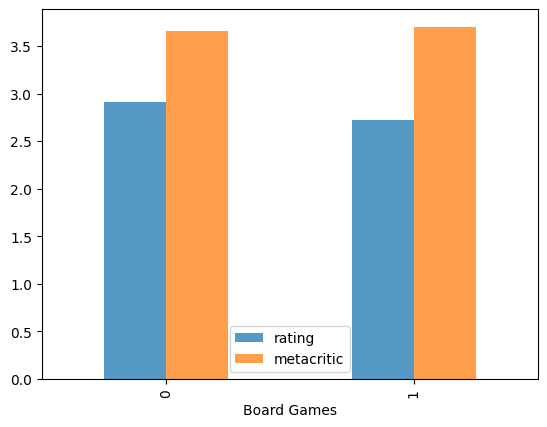

<Figure size 1200x600 with 0 Axes>

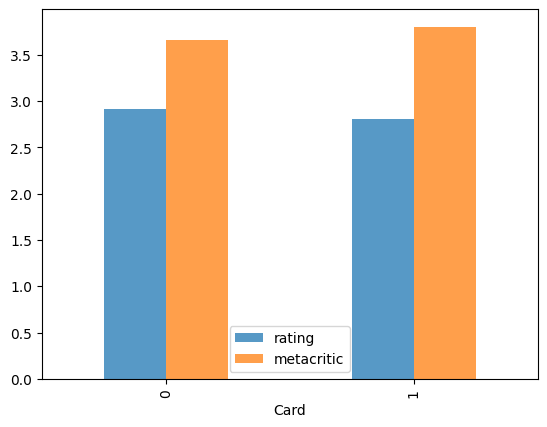

<Figure size 1200x600 with 0 Axes>

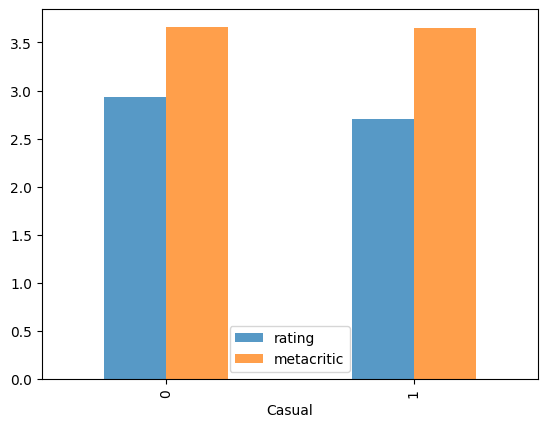

<Figure size 1200x600 with 0 Axes>

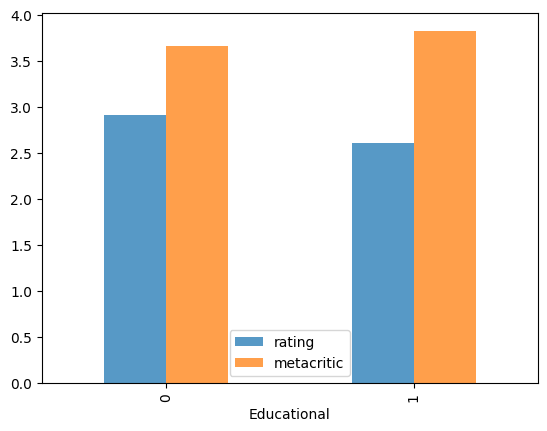

<Figure size 1200x600 with 0 Axes>

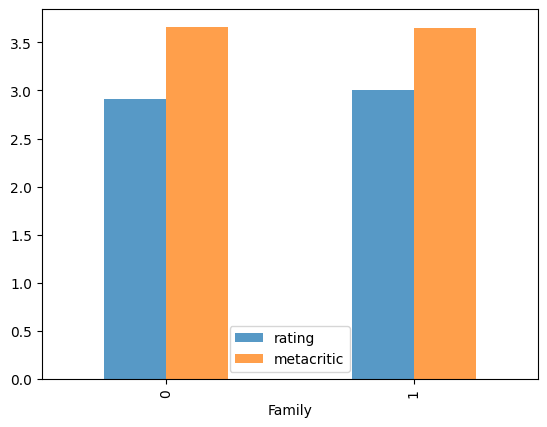

<Figure size 1200x600 with 0 Axes>

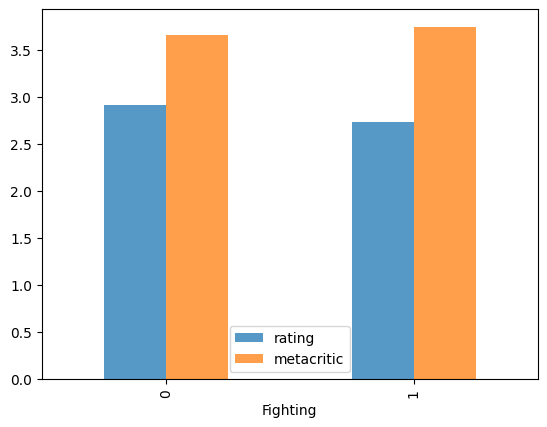

<Figure size 1200x600 with 0 Axes>

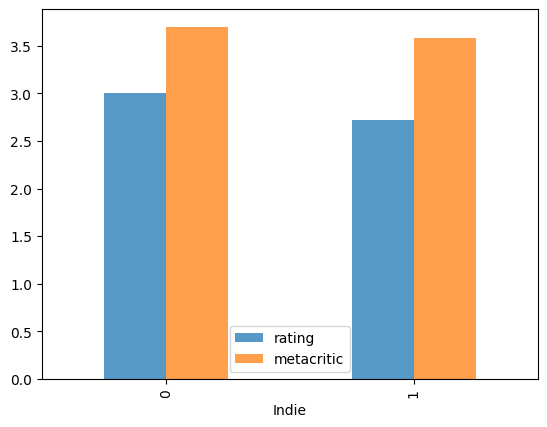

<Figure size 1200x600 with 0 Axes>

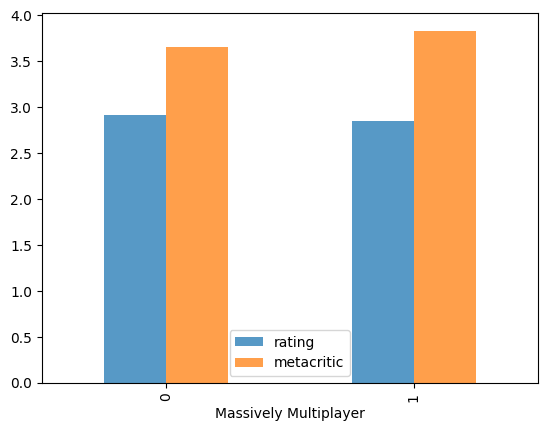

<Figure size 1200x600 with 0 Axes>

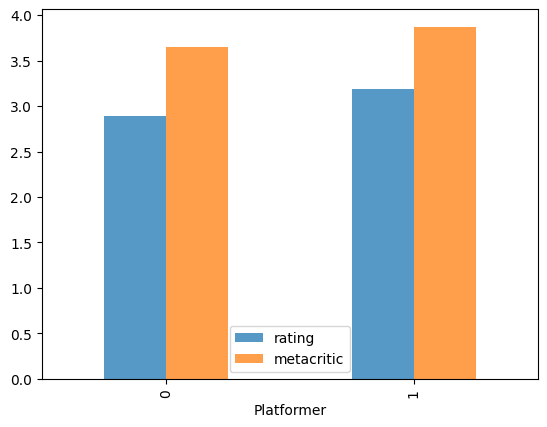

<Figure size 1200x600 with 0 Axes>

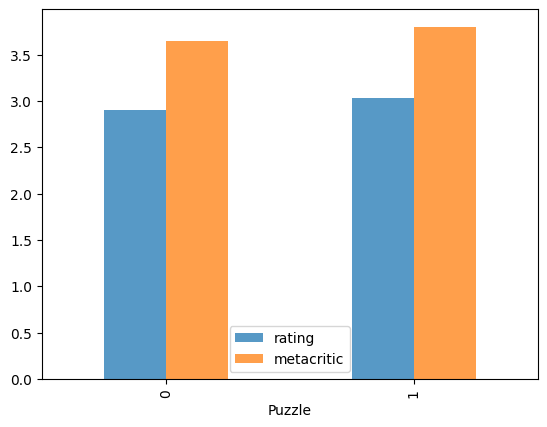

<Figure size 1200x600 with 0 Axes>

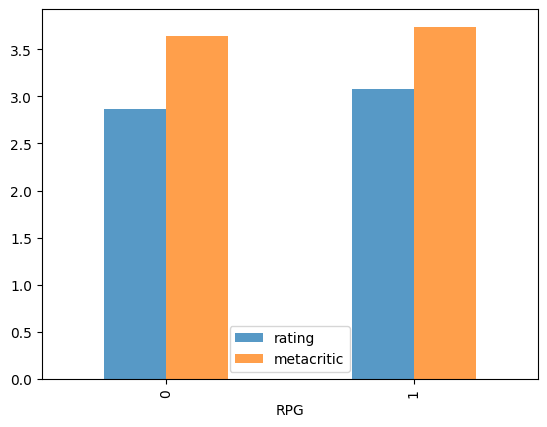

<Figure size 1200x600 with 0 Axes>

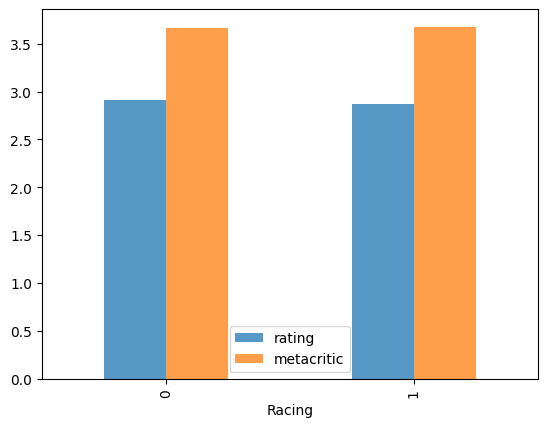

<Figure size 1200x600 with 0 Axes>

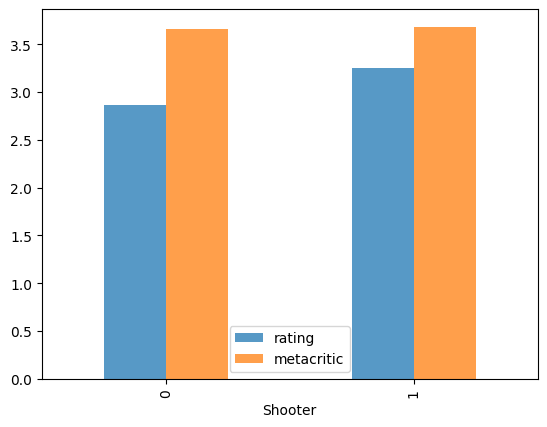

<Figure size 1200x600 with 0 Axes>

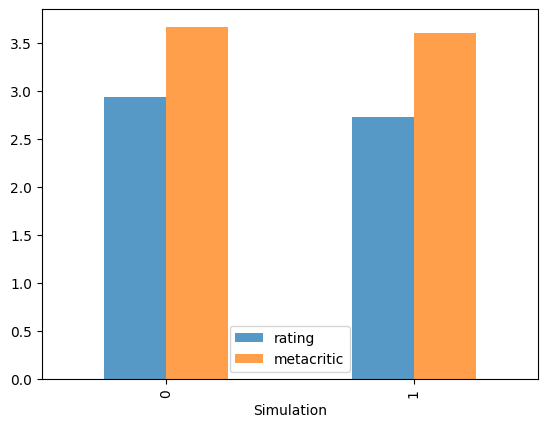

<Figure size 1200x600 with 0 Axes>

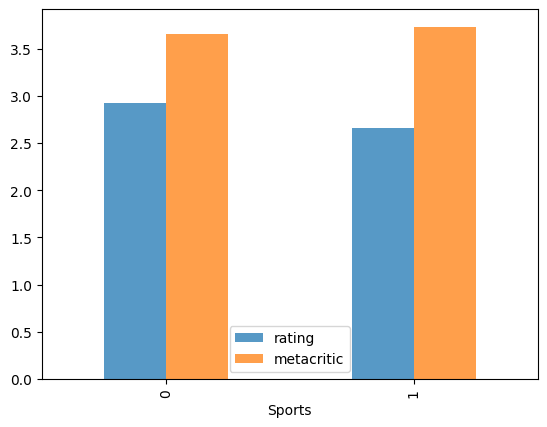

<Figure size 1200x600 with 0 Axes>

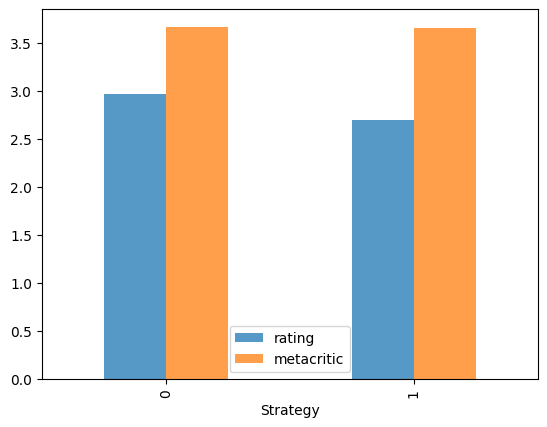

In [88]:
for genre in genres_dummies:
    genre_ratings = metacritic_info.groupby(genre)[['rating', 'metacritic']].mean()
    plt.figure(figsize=(12, 6))
    genre_ratings.plot(kind='bar', alpha=0.75)
#plt.title('Average User Rating and Metacritic Rating by Genre')
#plt.xlabel('Genre')
#plt.ylabel('Average Rating')
#plt.legend(['User Rating', 'Metacritic Rating'])
#plt.xticks(rotation=45, ha='right')
#plt.show()


Not much information we can get from this. There doesn't seem to be a lot of variety in the difference between average user and critic reviews for specific genres.

It appears that the most promising potential relationship is between user and metacritic ratings at a macro level. Some additional independant variables we can include in a predictive model are number of reviews and reccomendations (which may be good proxies for the relative popularity of a game) in addition to the total number of downloads. We can also look further into the impact of genres, achievements, and playtime length on ratings. For this dataset, regression and nearest neighbor models could both potentially be good fits. We plan to build both to see which performs better, and will consider aggregating them in some way if they both perform well. Before we build this model, though, we should explore ways to avoid having games that did not recieve user reviews skew our model. We coud consider removing these entries, or using an imputer to distribute them uniformly.